In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

E:\Apps\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
mnist_data = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11493376/11490434 [==============================] - 7s 1us/step


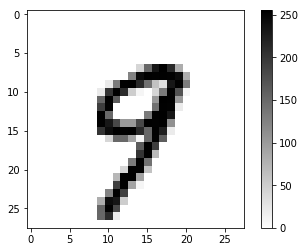

In [8]:
plt.figure()
plt.imshow(train_images[57], cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer=tf.train.GradientDescentOptimizertOptimizer(0.1),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.4697 - acc: 0.8755
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.3037 - acc: 0.9147
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2835 - acc: 0.9206
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.2728 - acc: 0.9233
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2666 - acc: 0.9261


In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 24us/step


In [15]:
print(test_acc)

0.926


In [16]:
predictions = model.predict(test_images)

In [17]:
test = model.get_layer(index=1).get_weights()[0][:,2].reshape((28,28))

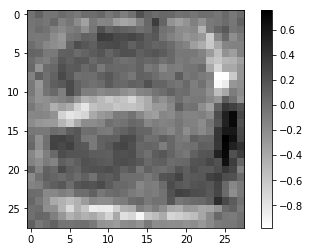

In [18]:
plt.figure()
plt.imshow(test, cmap='gray_r')
plt.colorbar()
plt.grid(False)
plt.show()